What is Multilinear Regression?

Multilinear Regression is an extension of Linear Regression where:
				One target (output)
				Multiple input features (variables)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
%pip install statsmodels

In [9]:
data = {
    'Size': [1200, 1500, 1800, 2000, 2300],
    'Bedrooms': [2, 3, 3, 4, 4],
    'Age': [10, 5, 8, 2, 1],
    'Price': [200000, 280000, 310000, 400000, 450000]
}

df = pd.DataFrame(data)

In [10]:
# Robust feature/target selection:
# Prefer the example columns if present, otherwise fall back to numeric columns in df.
desired_features = ['Size', 'Bedrooms', 'Age']
if all(col in df.columns for col in desired_features) and 'Price' in df.columns:
	X = df[desired_features]
	y = df['Price']
else:
	numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
	if not numeric_cols:
		raise ValueError("No numeric columns found in df to build features/target.")

	# Prefer TARGET (if defined and numeric), then 'Price' if present, otherwise pick the last numeric column as target.
	if 'TARGET' in globals() and TARGET in numeric_cols:
		target = TARGET
	elif 'Price' in numeric_cols:
		target = 'Price'
	else:
		# choose a reasonable default target
		target = numeric_cols[-1]

	y = df[target]
	X = df.drop(columns=[target])

	print(f"Using features: {X.columns.tolist()} and target: '{target}'")

In [11]:
model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 57105.26315789361
Coefficients: [  159.21052632  8421.05263158 -6973.68421053]


In [13]:
# Make	predictions
# Predict price for a new house
new_house = [[1900, 3, 4]]
predicted_price = model.predict(new_house)

print("Predicted Price:", predicted_price[0])


Predicted Price: 356973.68421052647


c:\Users\Noman Traders\Documents\GitHub\ml-daily-journal\ml-env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
data1 = {
    'Study_Hours': [2, 4, 6, 8, 9],
    'Attendance': [60, 70, 80, 85, 90],
    'Previous_GPA': [2.5, 3.0, 3.2, 3.6, 3.8],
    'Final_Marks': [55, 65, 75, 85, 92]
}

df1 = pd.DataFrame(data1)

In [17]:
X = df[['Study_Hours', 'Attendance', 'Previous_GPA']]
y = df['Final_Marks']

In [18]:
model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")

Intercept: 45.769230769230816
Coefficients:
Study_Hours: 5.307692307692314
Attendance: -0.09230769230769213
Previous_GPA: 1.538461538461512


In [20]:
new_student = [[7, 82, 3.4]]
predicted_marks = model.predict(new_student)

print("Predicted Final Marks:", predicted_marks[0])

Predicted Final Marks: 80.5846153846154


c:\Users\Noman Traders\Documents\GitHub\ml-daily-journal\ml-env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
fname = "placement.csv"

# search current directory and parent directories for the file
matches = []
for root in [Path(".")] + list(Path.cwd().parents):
	matches.extend(list(root.rglob(fname)))

if matches:
	path = matches[0]
	print(f"Found file at: {path}")
	dataset = pd.read_csv(path)
	print(dataset.head(10))
else:
	print(f"File '{fname}' not found. Checked current and parent directories.")

Found file at: c:\Users\Noman Traders\Documents\GitHub\ml-daily-journal\datasets\placement.csv
   cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57
5  7.89     2.99
6  6.73     2.60
7  6.75     2.48
8  6.09     2.31
9  8.31     3.51


Dataset shape: (200, 2)
cgpa       float64
package    float64
dtype: object

Numeric columns: ['cgpa', 'package']

First rows:


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57



Using TARGET = 'package'. Edit TARGET variable above to try a different target.

Final data for modeling: 200 rows, 1 features
Train R2: 0.7758339025733345 RMSE: 0.335533556419363
Test  R2: 0.7730984312051673 RMSE: 0.2901316659954521


,feature,coefficient
0,cgpa,0.574256



OLS summary (training data):
                            OLS Regression Results                            
Dep. Variable:                package   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     546.8
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           3.56e-53
Time:                        23:36:03   Log-Likelihood:                -52.305
No. Observations:                 160   AIC:                             108.6
Df Residuals:                     158   BIC:                             114.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0270 

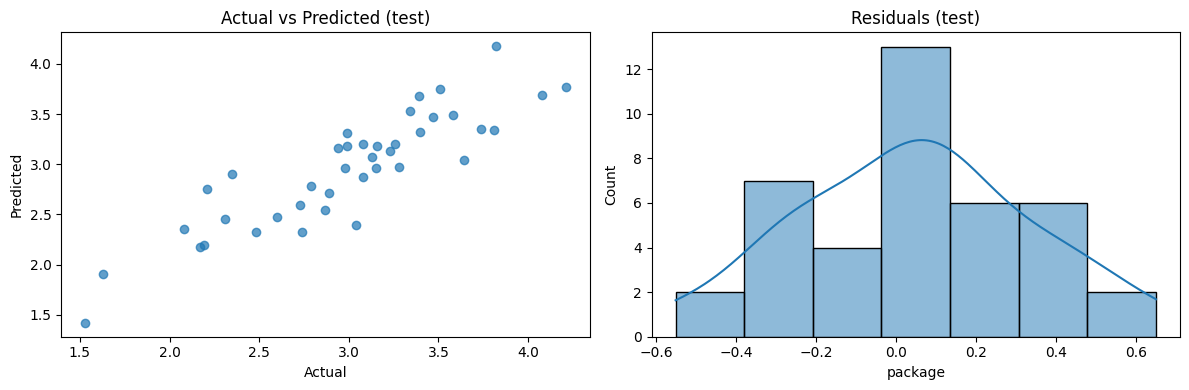

In [6]:
# Multivariate linear regression practice
# Edit TARGET below to choose a numeric target column (e.g., 'package').
# This cell uses `dataset` loaded in a previous cell.

import statsmodels.api as sm

# quick dataset overview
print("Dataset shape:", dataset.shape)
print(dataset.dtypes)
print("\nNumeric columns:", dataset.select_dtypes(include=["number"]).columns.tolist())
print("\nFirst rows:")
display(dataset.head())

# Choose target (change this to the column you want to predict)
numeric_cols = dataset.select_dtypes(include=["number"]).columns.tolist()
if not numeric_cols:
	raise ValueError("No numeric columns available for regression in the dataset.")
TARGET = "package" if "package" in numeric_cols else numeric_cols[0]
print(f"\nUsing TARGET = '{TARGET}'. Edit TARGET variable above to try a different target.\n")

# Prepare features (encode categoricals), drop rows with missing values in selected cols
df = dataset.copy()
y = df[TARGET]
X = df.drop(columns=[TARGET])

X = pd.get_dummies(X, drop_first=True)  # encode categorical variables
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=[TARGET])
y = data[TARGET]

print(f"Final data for modeling: {X.shape[0]} rows, {X.shape[1]} features")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions & metrics
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

def rmse(a, b): return np.sqrt(mean_squared_error(a, b))

print("Train R2:", r2_score(y_train, y_pred_train), "RMSE:", rmse(y_train, y_pred_train))
print("Test  R2:", r2_score(y_test, y_pred_test), "RMSE:", rmse(y_test, y_pred_test))

# Coefficients
coef_df = pd.DataFrame({
	"feature": X.columns,
	"coefficient": lr.coef_
}).sort_values(by="coefficient", key=lambda s: s.abs(), ascending=False)
display(coef_df.head(20))

# Statsmodels OLS summary (on training data)
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nOLS summary (training data):")
print(ols_model.summary())

# Diagnostic plots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (test)")

plt.subplot(1,2,2)
residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.title("Residuals (test)")
plt.tight_layout()